# <div class="alert alert-success">
<h2> Комментарий ревьюера</h2>
    
Привет! Меня зовут Алексей Тюрин, я буду делать ревью твоей работы. Давай будем общаться на «ты».

У тебя хорошая, аккуратная работа 👍. В ней всё здорово, я её вернул, чтобы у тебя была возможность посмотреть комментарии и задать вопросы, если есть. Стоит только на желтые комментарии внимание обратить.

---
Комментарии делятся на 3 группы:
    
Зелёным цветом отмечены комментарии, либо подчёркивающие удачные решения, либо содержащие какую-то дополнительную информацию или советы, они формально не требуют правки, но правки приветствуются. Выделены они так:

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Тут текст    
</div>    

Жёлтым цветом выделены правки, которые желательны:

<div class="alert alert-warning"; style="border-left: 7px solid yellow" >
<h3>!! Комментарий ревьюера</h3>
    
Тут текст    
</div>    

Красным выделены правки, которые обязательны
    
<div class="alert alert-danger"; style="border-left: 7px solid red">
<h3>👀 Комментарий ревьюера</h3>
    
Тут текст    
</div>    
    
Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если оставляешь комментарии на какой-то итерации ревью, пиши что-то вроде `комментарий студента V.{номер итерации}`
</div>

Цвет можно сделать, например, так

<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
Ревьюер душнила :)
</div>

Или так:
    
<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<h3>Комментарий студента </h3>
    ...
</div>

# Исследование зависимости стоимости недвижимости от различных факторов.

<div class="alert alert-warning"; style="border-left: 7px solid yellow" >
<h3>!! Комментарий ревьюера</h3>
    
Проект это не только код, но ещё и определенный контекст. Этот контекст: описание предметной области проекта и поставленных задач нужно в начале работы писать
</div>  

<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
Добавила описание.
</div>


На основании данных сервиса Яндекс Недвижимость имеем архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.\
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические.\
**Задачи:**
 - выполнить предобработку данных
 - выявить особенности и зависимости, которые существуют на рынке недвижимости.

**Описание данных**
 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - balcony — число балконов
 - ceiling_height — высота потолков (м)
 - cityCenters_nearest — расстояние до центра города (м)
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - first_day_exposition — дата публикации
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - last_price — цена на момент снятия с публикации
 - living_area — жилая площадь в квадратных метрах (м²)
 - locality_name — название населённого пункта
 - open_plan — свободная планировка (булев тип)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — общая площадь квартиры в квадратных метрах (м²)
 - total_images — число фотографий квартиры в объявлении

## 1. Общий обзор датасета

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

<div class="alert alert-warning"; style="border-left: 7px solid yellow" >
<h3>!! Комментарий ревьюера</h3>
    
Здорово, что делаешь проект локально, но почему у тебя по одному пути `decimal=','`, а по другому нет? Если посмотреть в датасет, то разделитель в числах это **точка**
</div>    
<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
Потому что забыла удалить)))
</div>

In [269]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


По первым 20 строчкам уже видим наличие пропусков в столбцах ceiling_height, living_area, is_apartment, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000б, ponds_nearest, days_exposition. Так же видим, что есть дни экспозиции с дробными окончаниями. В некоторых строчках полностью отсутствуют картографические данные.

In [270]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

С названиями столбцов все в проядке.

In [271]:
print('Количество строк', data.shape[0])

Количество строк 23699


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Большое число пропусков, с которыми необходимо поработать.

Посмотрим на данные визуально.

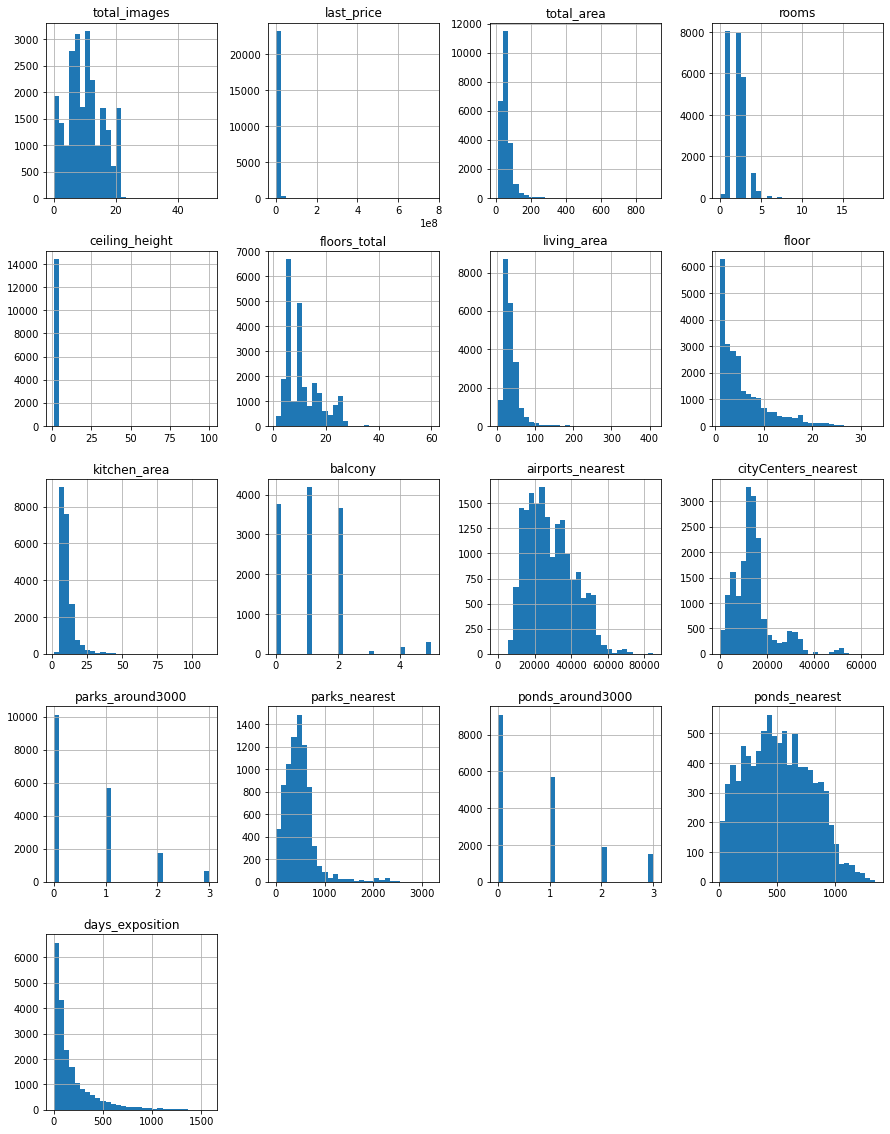

In [273]:
data.hist(bins= 30,figsize=(15, 20))
plt.show()

Большинство гистограмм имеют множество пиков, а так же длинные хвосты.Все это говорит о том, что в выборке присутствуют данные ,которые являются некорректными и могут повлиять на дальнейшее прогнозирование, поэтому с ними необходимо порабоать.

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Не все величины распределены нормально и в этом ничего плохого нет. `days_exposition`, например, имеет экспоненциальное распределение: оно описывает время между событиями, которые происходят с какой-то интенсивностью</div>    


## 2. Предобработка данных

### Удаление пропусков

In [274]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


<div class="alert alert-warning"; style="border-left: 7px solid yellow" >
<h3>!! Комментарий ревьюера</h3>
    
На данно этапе такая замена нормальна, но в целом такое большое количество пропусков просто медианой заменять не стоит. В предыдущем проекте, например, пропуски заменялись на медиану в зависимости от типа занятости клиента. В центре высота потолков обычно выше, а такая замена этого не учитывает. Поэтому лучше было бы либо оставить пропуски, либо при замене учитывать расстояние до центра. С `kitchen_area` в целом аналогично, при такой замене можно получть площадь кухни, которая будет больше `total_area`, например, поэтому для кухонь можно сгруппировать по числу комнат, посчитать для каждой группы отношение `kitchen_area / total_area` и заменить пропуски на произведение `total_area` и значения для соответствующей группы. Выглядело бы, например, так:
    
```python
   
gr = data.groupby('rooms')
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * gr['kitchen_area'].transform(lambda x : (x / gr.get_group(x.name)['total_area']).mean()))
 
    
```
</div>  

<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
В кухнях воспользовалась советом, правда мы еще не изучали лямбда функции и я туго догнала код,а вот в потолках оставила как и было медианные значения, потому что оставлять пропуски, их слишком много, а по расстоянию от центра посмотрела уникальные значения в высоте до 5 км и более 5 км, в целом ничем не отличились срезы.А еще есть вопрос, не правильнее ли сначала обработать аномалии , а потом заполнять пропуски.Ведь в расчетах участвуют например высоты в 27 м или 1.
</div>

Заменим пропуски в **kitchen_area** сгруппировав данные по числу комнат.\
Считаем для каждой группы  долю площади кухни от общей (отношение kitchen_area / total_area)\
Заменяем пропуски на произведение total_area и значения для соответствующей группы

In [275]:
gr = data.groupby('rooms')
data['kitchen_area'] = (data['kitchen_area']
                        .fillna(data['total_area'] * gr['kitchen_area']
                        .transform(lambda x : (x / gr.get_group(x.name)['total_area']).mean())))


In [276]:
data.query('kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Осталось 197 пропусков, в данных строчках количество комнат равно 0.Пока оставлю пропуски, и отработаю данную аномалию дальше

Заменим пропуски в **ceiling_height** медианными значениями.


In [277]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Пропуски в **floors_total** удалю, поскольку реальную высоту здания я не знаю, а для дальнейшего исследования необходимо понимать реальную высоту здания в этажах. Предполагаю,что пропуски возникли при заполнении заявлений продавцами, которые просто не указали информацию.

In [278]:
data = data.dropna(subset = ['floors_total'])

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Да. пропусков немного, поэтому удалить хорошее решение</div>    


Разберемся с пропусками в **is_apartment**. 

In [282]:
data['is_apartment'].unique()

array([False,  True])

Если люди не указали,что недвижимость является коммерческой, значит она жилая, заменим все пропуски на **False**

In [284]:
data['is_apartment'].fillna(False, inplace=True)


C:\Users\79879\AppData\Local\Temp\ipykernel_12552\4221261463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_apartment'].fillna(False, inplace=True)


Пропуски в **balcony** заменим на 0, поскольку,если продавец не указал число балконов, то вероятно они отсутствуют.

In [285]:
data['balcony'].fillna(0, inplace=True)


C:\Users\79879\AppData\Local\Temp\ipykernel_12552\4169825907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'].fillna(0, inplace=True)


49 пропусков в столбце **locality_name** относительно 23699 строчек датафрейма - это 0,2% данных,смело удаляем их.

In [286]:
data.dropna(subset=['locality_name'], inplace=True)


C:\Users\79879\AppData\Local\Temp\ipykernel_12552\3529794061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['locality_name'], inplace=True)


Посмотрим на дату публикаций в строках с пропущенными **days_exposition**

C:\Users\79879\AppData\Local\Temp\ipykernel_12552\376602042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


<AxesSubplot:>

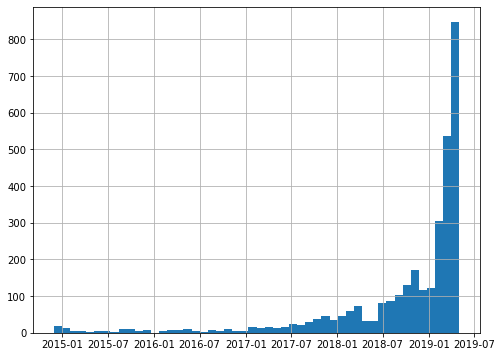

In [287]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.query('days_exposition.isna()')['first_day_exposition'].hist(bins=50,figsize=(8,6))

Из графика видно,что большая часть объявлений опубликована в последние 3-4 месяца перед сбором данных

Посмотрим на дату публикаций в строках где **days_exposition** имеет значения.

<AxesSubplot:>

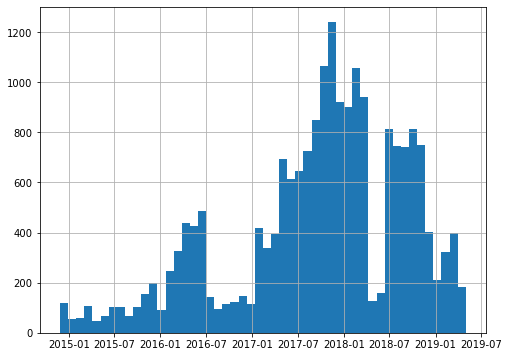

In [288]:
data.query('days_exposition.isna() == False')['first_day_exposition'].hist(bins=50,figsize=(8,6))


Как видим основная масса объявлений, проданных квартир, размещались с 2017 по 2018 года.

Пропуски в **days_exposition** оставляю, предпологаю,что объявления еще размещены и квартиры не проданы.

<div class="alert alert-warning"; style="border-left: 7px solid yellow" >
<h3>!! Комментарий ревьюера</h3>
    
    
В `days_exposition` пропусков много и так ты удаляешь вполне валидные значения в других столбцах, что может влиять на анализ соотношение между другими параметрами. Пропуски, действительно, у ещё не проданных квартир. Чтобы в этом убедиться, можно сравнить гистограммы для столбца `first_day_exposition` для двух срезов: среза по `days_exposition.isna()` и среда по `days_exposition.isna() == False`. Перед построением гистограмм нужно привести столбец `first_day_exposition` к типу `datetime`


Т.к. в проекте исследуется только влияние параметров на цену, то в целом, удалить непроданные квартиры можно, т.к. у них может быть какое-то несправедливое отношение между параметрами. Но на ровном месте лучше не удалять, а сравнивать, например, зависимости между двумя срезами
</div>    
<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
Спасибо за рекомндацию.
</div>

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
>  last_price -цена на момент снятия с публикации

Ну имеется в виду, что это последняя цена, а не какая-то историческая
</div>    


<div class="alert alert-warning"; style="border-left: 7px solid yellow" >
<h3>!! Комментарий ревьюера</h3>
    
Отмечу ещё один момент. У тебя локально должно стоять то же самое окружение, что и на платформе в смысле версий библиотек. Это важно, т.к. функции в разных версиях могут работать по-разному. Например, в версии на платформе `dropna` в качестве `subset` принимает коллекцию, поэтому код выше не работал (я обернул везде `subset` в список)
    
```python
    
TypeError("Index(...) must be called with a collection of some kind, 'days_exposition' was passed")
    
```

</div>    
<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
Учла, скачаю окружение.
</div>


In [289]:
try:
    data.dropna(subset='days_exposition')
except Exception as e:
    print(repr(e))

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
В практикуме такое окружение:

```python
   
# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: linux-64
_libgcc_mutex=0.1=conda_forge
_openmp_mutex=4.5=1_gnu
abseil-cpp=20210324.2=h9c3ff4c_0
absl-py=1.2.0=pypi_0
alembic=1.6.5=pyhd8ed1ab_0
anyio=3.2.1=py39hf3d152e_0
argon2-cffi=20.1.0=py39h3811e60_2
arrow-cpp=5.0.0=py39h3d6947c_1_cpu
astunparse=1.6.3=pypi_0
async_generator=1.10=py_0
attrs=20.3.0=pypi_0
aws-c-cal=0.5.11=h95a6274_0
aws-c-common=0.6.2=h7f98852_0
aws-c-event-stream=0.2.7=h3541f99_13
aws-c-io=0.10.5=hfb6a706_0
aws-checksums=0.1.11=ha31a3da_7
aws-sdk-cpp=1.8.186=hb4091e7_3
babel=2.9.1=pyh44b312d_0
backcall=0.2.0=pyh9f0ad1d_0
backports=1.0=py_2
backports.functools_lru_cache=1.6.4=pyhd8ed1ab_0
beautifulsoup4=4.9.3=pypi_0
bleach=3.3.0=pyh44b312d_0
blinker=1.4=py_1
blis=0.7.8=pypi_0
branca=0.5.0=pypi_0
brotlipy=0.7.0=py39h3811e60_1001
bzip2=1.0.8=h7f98852_4
c-ares=1.17.1=h7f98852_1
ca-certificates=2022.6.15=ha878542_0
cachetools=5.2.0=pypi_0
catalogue=2.0.8=pypi_0
catboost=1.0.3=pypi_0
certifi=2021.5.30=pypi_0
certipy=0.1.3=py_0
cffi=1.14.5=py39he32792d_0
chardet=4.0.0=py39hf3d152e_1
click=8.1.3=pypi_0
conda=4.10.2=py39hf3d152e_0
conda-package-handling=1.7.3=py39h3811e60_0
configurable-http-proxy=4.4.0=node15_he6ea98c_0
convertdate=2.4.0=pypi_0
cryptography=3.4.7=py39hbca0aa6_0
cycler=0.11.0=pypi_0
cymem=2.0.6=pypi_0
dawg-python=0.7.2=pypi_0
debugpy=1.3.0=py39he80948d_0
decorator=5.0.9=pyhd8ed1ab_0
defusedxml=0.7.1=pyhd8ed1ab_0
docopt=0.6.2=pypi_0
en-core-web-sm=3.2.0=pypi_0
entrypoints=0.3=pyhd8ed1ab_1003
et-xmlfile=1.1.0=pypi_0
filelock=3.8.0=pypi_0
findspark=1.4.2=pypi_0
flatbuffers=2.0.7=pypi_0
folium=0.12.1.post1=pypi_0
fuzzywuzzy=0.18.0=pypi_0
gast=0.4.0=pypi_0
gensim=4.1.2=pypi_0
gflags=2.2.2=he1b5a44_1004
glog=0.5.0=h48cff8f_0
google-auth=2.11.0=pypi_0
google-auth-oauthlib=0.4.6=pypi_0
google-pasta=0.2.0=pypi_0
greenlet=1.1.0=py39he80948d_0
grpc-cpp=1.39.0=h36ce80c_1
grpcio=1.47.0=pypi_0
gspread=5.0.0=pypi_0
h5py=3.7.0=pypi_0
hijri-converter=2.2.4=pypi_0
holidays=0.11.3.1=pypi_0
huggingface-hub=0.9.1=pypi_0
icu=68.1=h58526e2_0
idna=2.10=pyh9f0ad1d_0
importlib-metadata=4.6.1=py39hf3d152e_0
ipykernel=6.0.1=py39hef51801_0
ipython=7.25.0=py39hef51801_1
ipython_genutils=0.2.0=py_1
ipywidgets=7.6.3=pypi_0
jedi=0.18.0=py39hf3d152e_2
jinja2=3.0.1=pyhd8ed1ab_0
joblib=1.1.0=pypi_0
json5=0.9.5=pyh9f0ad1d_0
jsonschema=3.2.0=pyhd8ed1ab_3
jupyter=1.0.0=pypi_0
jupyter-console=6.4.2=pypi_0
jupyter-contrib-core=0.4.0=pypi_0
jupyter-contrib-nbextensions=0.5.1=pypi_0
jupyter-highlight-selected-word=0.2.0=pypi_0
jupyter-latex-envs=1.4.6=pypi_0
jupyter-nbextensions-configurator=0.5.0=pypi_0
jupyter_client=6.1.12=pyhd8ed1ab_0
jupyter_core=4.7.1=py39hf3d152e_0
jupyter_server=1.9.0=pyhd8ed1ab_0
jupyter_telemetry=0.1.0=pyhd8ed1ab_1
jupyterhub=1.4.2=pypi_0
jupyterlab=3.0.16=pyhd8ed1ab_0
jupyterlab-widgets=3.0.2=pypi_0
jupyterlab_pygments=0.1.2=pyh9f0ad1d_0
jupyterlab_server=2.6.0=pyhd8ed1ab_0
keras=2.7.0=pypi_0
keras-preprocessing=1.1.2=pypi_0
kiwisolver=1.4.4=pypi_0
korean-lunar-calendar=0.2.1=pypi_0
krb5=1.19.1=hcc1bbae_0
langcodes=3.3.0=pypi_0
ld_impl_linux-64=2.36.1=hea4e1c9_1
libarchive=3.5.1=hccf745f_2
libblas=3.9.0=11_linux64_openblas
libbrotlicommon=1.0.9=h7f98852_5
libbrotlidec=1.0.9=h7f98852_5
libbrotlienc=1.0.9=h7f98852_5
libcblas=3.9.0=11_linux64_openblas
libclang=14.0.6=pypi_0
libcurl=7.77.0=h2574ce0_0
libedit=3.1.20191231=he28a2e2_2
libev=4.33=h516909a_1
libevent=2.1.10=hcdb4288_3
libffi=3.3=h58526e2_2
libgcc-ng=9.3.0=h2828fa1_19
libgfortran-ng=12.1.0=h69a702a_16
libgfortran5=12.1.0=hdcd56e2_16
libgomp=9.3.0=h2828fa1_19
libiconv=1.16=h516909a_0
liblapack=3.9.0=11_linux64_openblas
libnghttp2=1.43.0=h812cca2_0
libopenblas=0.3.17=pthreads_h8fe5266_1
libprotobuf=3.16.0=h780b84a_0
libsodium=1.0.18=h36c2ea0_1
libsolv=0.7.19=h780b84a_4
libssh2=1.9.0=ha56f1ee_6
libstdcxx-ng=9.3.0=h6de172a_19
libthrift=0.14.2=he6d91bd_1
libutf8proc=2.6.1=h7f98852_0
libuv=1.41.1=h7f98852_0
libxml2=2.9.12=h72842e0_0
lightgbm=3.3.1=pypi_0
llvmlite=0.39.0=pypi_0
lxml=4.6.3=pypi_0
lz4-c=1.9.3=h9c3ff4c_0
lzo=2.10=h516909a_1000
mako=1.1.4=pyh44b312d_0
mamba=0.14.1=py39h951de11_0
markdown=3.4.1=pypi_0
markupsafe=2.1.1=pypi_0
matplotlib=3.3.4=pypi_0
matplotlib-inline=0.1.2=pyhd8ed1ab_2
mistune=0.8.4=py39h3811e60_1004
murmurhash=1.0.8=pypi_0
nbclassic=0.3.1=pyhd8ed1ab_1
nbclient=0.5.3=pyhd8ed1ab_0
nbconvert=6.0.7=pypi_0
nbformat=5.1.3=pyhd8ed1ab_0
nbgrader=0.6.1=pypi_0
ncurses=6.2=h58526e2_4
nest-asyncio=1.5.1=pyhd8ed1ab_0
nltk=3.6.1=pypi_0
nodejs=15.14.0=h92b4a50_0
notebook=6.4.0=pyha770c72_0
numba=0.56.0=pypi_0
numpy=1.20.1=pypi_0
oauthlib=3.1.1=pyhd8ed1ab_0
openpyxl=3.0.9=pypi_0
openssl=1.1.1k=h7f98852_0
opt-einsum=3.3.0=pypi_0
orc=1.6.9=h58a87f1_0
packaging=21.3=pypi_0
pamela=1.0.0=py_0
pandas=1.2.4=pypi_0
pandoc=2.14.0.3=h7f98852_0
pandocfilters=1.4.2=py_1
parquet-cpp=1.5.1=2
parso=0.8.2=pyhd8ed1ab_0
pathy=0.6.2=pypi_0
patsy=0.5.2=pypi_0
pexpect=4.8.0=pyh9f0ad1d_2
pickleshare=0.7.5=py_1003
pillow=8.4.0=pypi_0
pip=21.1.3=pyhd8ed1ab_0
plotly=5.4.0=pypi_0
preshed=3.0.7=pypi_0
prometheus_client=0.11.0=pyhd8ed1ab_0
prompt-toolkit=3.0.19=pyha770c72_0
protobuf=3.19.4=pypi_0
psycopg2-binary=2.9.2=pypi_0
ptyprocess=0.7.0=pyhd3deb0d_0
py4j=0.10.9.3=pypi_0
pyarrow=5.0.0=py39h3ebc44c_1_cpu
pyasn1=0.4.8=pypi_0
pyasn1-modules=0.2.8=pypi_0
pycosat=0.6.3=py39h3811e60_1006
pycparser=2.20=pyh9f0ad1d_2
pycurl=7.43.0.6=py39h72e3413_1
pydantic=1.8.2=pypi_0
pygments=2.9.0=pyhd8ed1ab_0
pyjwt=2.1.0=pyhd8ed1ab_0
pymeeus=0.5.11=pypi_0
pymorphy2=0.9.1=pypi_0
pymorphy2-dicts-ru=2.4.417127.4579844=pypi_0
pymystem3=0.2.0=pypi_0
pyod=0.9.5=pypi_0
pyopenssl=20.0.1=pyhd8ed1ab_0
pyparsing=2.4.7=pyh9f0ad1d_0
pyrsistent=0.17.3=py39h3811e60_2
pysocks=1.7.1=py39hf3d152e_3
pyspark=3.0.2=pyh44b312d_0
python=3.9.5=h49503c6_0_cpython
python-dateutil=2.8.1=py_0
python-editor=1.0.4=py_0
python-graphviz=0.20.1=pypi_0
python-json-logger=2.0.1=pyh9f0ad1d_0
python_abi=3.9=2_cp39
pytz=2021.1=pyhd8ed1ab_0
pyyaml=6.0=pypi_0
pyzmq=22.1.0=py39h37b5a0c_0
qtconsole=5.3.2=pypi_0
qtpy=2.2.0=pypi_0
re2=2021.06.01=h9c3ff4c_0
readline=8.1=h46c0cb4_0
regex=2022.8.17=pypi_0
reproc=14.2.1=h36c2ea0_0
reproc-cpp=14.2.1=h58526e2_0
requests=2.25.1=pyhd3deb0d_0
requests-oauthlib=1.3.1=pypi_0
requests-unixsocket=0.2.0=py_0
rsa=4.9=pypi_0
ruamel.yaml=0.17.10=py39h3811e60_0
ruamel.yaml.clib=0.2.2=py39h3811e60_2
ruamel_yaml=0.15.80=py39h3811e60_1004
s2n=1.0.10=h9b69904_0
sacremoses=0.0.53=pypi_0
scikit-learn=0.24.1=pypi_0
scipy=1.9.1=pypi_0
seaborn=0.11.1=pypi_0
send2trash=1.7.1=pyhd8ed1ab_0
setuptools=49.6.0=py39hf3d152e_3
six=1.16.0=pyh6c4a22f_0
smart-open=5.2.1=pypi_0
snappy=1.1.8=he1b5a44_3
sniffio=1.2.0=py39hf3d152e_1
soupsieve=2.3.2.post1=pypi_0
spacy=3.2.0=pypi_0
spacy-legacy=3.0.10=pypi_0
spacy-loggers=1.0.3=pypi_0
sqlalchemy=1.4.15=pypi_0
sqlite=3.36.0=h9cd32fc_0
srsly=2.4.4=pypi_0
statsmodels=0.13.2=pypi_0
tenacity=8.0.1=pypi_0
tensorboard=2.10.0=pypi_0
tensorboard-data-server=0.6.1=pypi_0
tensorboard-plugin-wit=1.8.1=pypi_0
tensorflow-cpu=2.7.0=pypi_0
tensorflow-estimator=2.7.0=pypi_0
tensorflow-io-gcs-filesystem=0.26.0=pypi_0
termcolor=1.1.0=pypi_0
terminado=0.10.1=py39hf3d152e_0
testpath=0.5.0=pyhd8ed1ab_0
thinc=8.0.17=pypi_0
threadpoolctl=3.1.0=pypi_0
tk=8.6.10=h21135ba_1
tokenizers=0.10.3=pypi_0
torch=1.10.0=pypi_0
tornado=6.1=py39h3811e60_1
tqdm=4.61.2=pyhd8ed1ab_1
traitlets=5.0.5=py_0
transformers=4.12.5=pypi_0
typer=0.4.2=pypi_0
typing-extensions=4.3.0=pypi_0
tzdata=2021a=he74cb21_1
urllib3=1.26.6=pyhd8ed1ab_0
wasabi=0.10.1=pypi_0
wcwidth=0.2.5=pyh9f0ad1d_2
webencodings=0.5.1=py_1
websocket-client=0.57.0=py39hf3d152e_4
werkzeug=2.2.2=pypi_0
wheel=0.36.2=pyhd3deb0d_0
widgetsnbextension=3.5.2=pypi_0
wrapt=1.14.1=pypi_0
xgboost=1.5.1=pypi_0
xlrd=2.0.1=pypi_0
xmltodict=0.12.0=pypi_0
xz=5.2.5=h516909a_1
yaml=0.2.5=h516909a_0
zeromq=4.3.4=h9c3ff4c_0
zipp=3.5.0=pyhd8ed1ab_0
zlib=1.2.11=h516909a_1010
zstd=1.5.0=ha95c52a_0
    
```
</div>    

Посчитаем корреляцию между жилой площадью и числом комнат.

In [290]:
data['living_area'].corr(data['rooms'])

0.8461168530398939

Корреляция положительная и близка к 1, значит заполню пропуски в **living_area** на медианное значение жилой площади, соответсвущего числа комнат.

Заменим пропуски в **living_area** сгруппировав данные по числу комнат.\
Считаем для каждой группы  долю жилой площади от общей (отношение living_area / total_area)\
Заменяем пропуски на произведение total_area и значения для соответствующей группы

In [291]:
gr = data.groupby('rooms')
data['living_area'] = (data['living_area']
                       .fillna(data['total_area'] * gr['living_area']
                       .transform(lambda x : (x / gr.get_group(x.name)['total_area']).mean())))

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Тут замена уже лучше. Можно технически и логически поступить также как выше в примере с кухнями</div>    
<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
Воспользовалась советом.
</div>


In [292]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропуски в **airports_nearest, cityCenters_nearest,parks_around3000,parks_nearest, ponds_around3000, ponds_nearest** оставляю. Предполагаю,что пропуски являются результатом слияния таблиц.

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Такие столбцы вероятно определяются автоматически (иначе как пользователь определяет расстояние?) и видимо для некоторых населенных пунктов такая функциональность не работает. Можно посмотреть на доли пропусков в зависимости от населенного пункта:
</div>    


In [293]:
# Код ревьюера

data.groupby('locality_name').agg({'cityCenters_nearest' : lambda x : x.isna().mean(),
                                   'locality_name' : 'count'})[lambda x : x['locality_name'] > 100]

,cityCenters_nearest,locality_name
locality_name,,
Волхов,1.000000,111
Всеволожск,1.000000,398
Выборг,1.000000,237
Гатчина,1.000000,307
Кингисепп,1.000000,104
Кириши,1.000000,125
Колпино,0.002959,338
Красное Село,0.011364,176
Кудрово,1.000000,171


In [294]:
print('Количество строк', data.shape[0])

Количество строк 23565


Итого из начальных данных потеряно 44 строки

### Изменение типов данных

In [295]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [296]:
data['last_price'] = data['last_price'].astype(int)
data['total_area'] = data['total_area'].astype(int)
data['living_area'] = data['living_area'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].round(0)

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Всё верно, но отмечу, что когда ты оставишь пропуски в столбце `days_exposition`, то тип `int` приводиться не будет. Достаточно будет округлить значения и оставить тип `float`
</div>    


В first_day_exposition ранее поменяла тип, так как это дата. В total_area, living_area и last_price на целочисленный для удобства рассчетов.В floors_total, balcony  меняем тип  на целочисленный поскольку число этажей,количество балконов не могут быть дробными. Посколько в days_exposition остались пропуски, округлила значение.

In [297]:
data.dtypes

total_images                     int64
last_price                       int32
total_area                       int32
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                      int32
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Обработка дубликатов

In [298]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [299]:
print('Количиество уникальных значений', len(data['locality_name'].unique()))

Количиество уникальных значений 364


Убираем явно выдающиеся дубликаты.

In [300]:
data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].replace('городской поселок', 'поселок городского типа', regex=True)
unique_list=data['locality_name'].unique()

Разделим все строки списка по запятой :

In [301]:
split_list=[]
for i in unique_list:
    i=i.split()
    split_list.extend(i)   
print(split_list)    

['Санкт-Петербург', 'поселок', 'Шушары', 'поселок', 'городского', 'типа', 'Янино-1', 'поселок', 'Парголово', 'поселок', 'Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'деревня', 'Кудрово', 'Коммунар', 'Колпино', 'поселок', 'городского', 'типа', 'Красный', 'Бор', 'Гатчина', 'деревня', 'Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск', 'деревня', 'Новое', 'Девяткино', 'поселок', 'Металлострой', 'поселок', 'городского', 'типа', 'Лебяжье', 'поселок', 'городского', 'типа', 'Сиверский', 'поселок', 'Молодцово', 'поселок', 'городского', 'типа', 'Кузьмоловский', 'садовое', 'товарищество', 'Новая', 'Ропша', 'Павловск', 'деревня', 'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня', 'Куттузи', 'поселок', 'Аннино', 'поселок', 'городского', 'типа', 'Ефимовский', 'поселок', 'Плодовое', 'деревня', 'Заклинье', 'поселок', 'Торковичи', 'поселок', 'Первомайское', 'Красное', 'Село', 'поселок', 'Понтонный', 'Сясьстрой', 'деревня', 'Старая', 'деревня', 'Лесколово'

Из списка split_list отберем только строки, начинающиеся с верхнего регистра, таким образом очистим список от территориальных наименований, оставив только названия.

In [302]:
name_list=[]

for i in split_list:
    if 'А'<=i[0]<='Я':
        name_list.append(i)
print(name_list)

['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино', 'Красный', 'Бор', 'Гатчина', 'Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск', 'Новое', 'Девяткино', 'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский', 'Новая', 'Ропша', 'Павловск', 'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское', 'Красное', 'Село', 'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый', 'Свет', 'Сланцы', 'Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый', 'Бор', 'Оржицы', 'Кальтино', 'Кудрово', 'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа', 'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск', 'Александровская', 'Лопухинка', 'Пикалёво', 'Терволово', 'Советс

В списке name_list есть строки не являющиеся названиями, удалим их

In [303]:
remove_list=['Новое','Село','Новый','Бор','Малое','Новая','Пансионат','Старая','Большая','Старые']
for i in remove_list:
    while i in name_list:
        name_list.remove(i) 

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Это на самом деле всё части названия, например Большая Ижора: https://ru.wikipedia.org/wiki/%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%B0%D1%8F_%D0%98%D0%B6%D0%BE%D1%80%D0%B0

Но в целом идея неплохая. Можно просто оставить из названий часть, которая начинается с большой буквы, чтобы убрать название типов:
</div>    
<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
Код ниже я так понимаю использует регулярные выражения, вроде так их называли)Но у нас они будут дальше,пока не проходили,поэтому не понимаю его.
</div>


In [304]:
# Код ревьюера

pd.Series(['посёлок Длинное Название','Санкт-Петербург']).str.extract('([А-Я][\w-]+(\s?[А-Я][\w-]+)*)')[0]

0    Длинное Название
1     Санкт-Петербург
Name: 0, dtype: object

Создадим таблицу с дубликатами

In [305]:
ser_name_list =  pd.Series(name_list)
duplicated_ser=ser_name_list.str.lower().duplicated()
df = pd.DataFrame()
df['наименование'] = ser_name_list
df['Дубликат'] = duplicated_ser

true_table = df.query('Дубликат == True')
print(true_table)


      наименование  Дубликат
47          Мурино      True
54         Кудрово      True
89         Павлово      True
106    Фёдоровское      True
145          Ропша      True
155        Колпаны      True
161          Рахья      True
163       Бегуницы      True
180         Рябово      True
187     Никольское      True
193         Ладога      True
240        Щеглово      True
243         Вещево      True
249        Красная      True
250          Горка      True
260  Приветнинское      True
269         Любань      True
271       Зимитицы      True
283      Гарболово      True
309        Громово      True
312       Калитино      True
314   Приладожский      True
320       Рабитицы      True
328      Романовка      True
333         Лесное      True


Заменим найденные дубликаты в названиях:

In [306]:
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово', regex=True)
data['locality_name'] = data['locality_name'].replace('село Павлово','поселок городского типа Павлово', regex=True)
data['locality_name'] = data['locality_name'].replace('деревня Бегуницы','деревня Старые Бегуницы' , regex=True)
data['locality_name'] = data['locality_name'].replace('садовое товарищество Рахья','поселок городского типа Рахья', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок Рябово','поселок городского типа Рябово', regex=True)
data['locality_name'] = data['locality_name'].replace('деревня Щеглово','поселок Щеглово', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок станции Вещево','поселок при железнодорожной станции Вещево' , regex=True)
data['locality_name'] = data['locality_name'].replace('деревня Фёдоровское', 'поселок городского типа Фёдоровское', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок Любань','Любань', regex=True)
data['locality_name'] = data['locality_name'].replace('деревня Зимитицы','поселок Зимитицы', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок Гарболово','деревня Гарболово', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок Калитино','деревня Калитино', regex=True)
data['locality_name'] = data['locality_name'].replace('садовое товарищество Приладожский','поселок городского типа Приладожский' , regex=True)
data['locality_name'] = data['locality_name'].replace('поселок станции Громово','поселок Громово', regex=True)


In [307]:
print('Количество уникальных значений', len(data['locality_name'].unique()))

Количество уникальных значений 309


Таким образом избавились от 55 неявных дубликатов.

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
👍
</div>    


### Обработка аномалий

In [308]:
data['ceiling_height'].unique()


array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Вероятно высоты более 10 м являются ошибкой при заполнии объявлений,где вместо метров указали высоту в сантиметрах.Исправим это.

In [309]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] / 10
data.query('ceiling_height > 10 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
👍
</div>    


Удалим строки, где высота потолка менее 2 метров.

In [310]:
data = data.drop(data[data['ceiling_height'] < 2].index)

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Отмечу, что если в `ceiling_height` будут пропуски, то такая строка пропуски удалит. Поэтому лучше делать как `data = data.drop(data[data['ceiling_height'] < 2].index)`
</div>    


In [311]:
data.query('ceiling_height < 2 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [312]:
data['total_area'].unique()

array([108,  40,  56, 159, 100,  30,  37,  71,  33,  61,  39,  44,  54,
        42,  36,  82,  31, 121,  80,  58,  32,  97,  76,  60,  70,  67,
        73, 149,  45,  74, 161,  48,  50,  52, 136,  41,  46,  35,  78,
       118,  57,  34,  55,  62,  79,  68,  43,  63,  72,  29,  47, 146,
        90,  38,  77, 124, 101,  21,  84, 180,  87,  65,  51,  49,  85,
       105,  86,  27,  53, 179,  81, 317,  75,  66, 154, 153,  83,  98,
       123, 111,  59, 119, 102, 158, 140, 120, 134, 115,  28, 116,  25,
       163,  69,  96, 103,  89, 151, 178, 106, 280, 216, 104, 225,  92,
       230, 130,  91,  23,  64, 113, 365, 165, 110, 142, 135, 187, 133,
       109, 183, 169, 131, 483, 200, 249,  24, 141,  17, 188,  26, 137,
       310, 181, 229,  99,  94, 132, 363, 170, 139, 211, 147,  95, 138,
       122, 107,  88, 323, 127,  93, 114, 201, 290,  22, 168, 150, 152,
       399, 166, 190, 364, 174, 145, 128,  20, 237, 125, 274, 224, 184,
       126, 215, 162, 228, 234, 117, 204, 304, 164, 173, 176, 16

Источник asninfo.ru сообщает, что площадь самой большой квартиры Санкт-Петербурга составляет 903,5  квадратных метров.Посмотри строки где, площадь более 500 кв.м.

In [313]:
data.query('total_area > 500 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3117,19,140000000,631,2019-03-30,7,2.65,5,415,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4237,1,50000000,517,2017-10-14,7,2.65,4,332,3,False,...,22.0,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000,590,2019-02-14,15,3.50,6,409,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
8018,20,84000000,507,2015-12-17,5,4.45,7,301,7,True,...,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
12859,20,140000000,631,2019-04-09,7,3.90,4,322,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000,618,2017-12-18,7,3.40,7,258,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
19540,8,420000000,900,2017-12-06,12,2.80,25,409,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Квартир всего 7, удалю их, на результаты исследования это сильно не повлияет, а вот помехи такие выбросы могут создать.

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
В целом на ровном месте резать тоже не стоит. Такие значения и правда могут влиять на анализ, например, на корреляцию, но в таком случае можно сравнить результаты с выбивающимися значениями и без них</div>    


In [314]:
data = data.loc[data['total_area'] <= 500]

Минимальная общая площадь жилого помещения для проживающих даже в коммунальных квартирах составляет 15 кв.м., соответсвенно общая площадь квартиры выше этого значения. Удалю строки с общей площадью менее 15 кв.м.

In [315]:
data = data.loc[data['total_area'] > 15]

In [316]:
data.shape[0]

23544

In [317]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10,  9, 19, 16],
      dtype=int64)

Количество комнат 0, удаляю.

In [318]:
data = data.query('rooms != 0')

In [319]:
data.shape[0]

23351

In [320]:
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52])

In [321]:
data['living_area'].unique()

array([ 51,  18,  34,  99,  32,  14,  10,  41,  15,  43,  20,  31,  30,
        27,  17,  55,  16,  19,  76,  48,  46,  39,  49,  52,  38, 104,
        26,  29,  59,  80,  28,  42,  25,  94,  33,  22,  68,  44,  35,
        21,  45,  50,  36,  40,  77,  67,  12,  61,  79,  73,   8,  60,
        86,  97, 183,  37,  23,  47,  57,  89,  72,  62,  56,  53,  88,
        63,  78,  65, 119,  66,  13,  74,  85, 126,  54,  70,  75, 159,
        24, 134, 130,  82, 240, 114,  95, 112,  83, 138,  64, 312, 125,
        90,   9, 180,  69, 107,  11,  84, 250, 160,  87, 222,  81,  93,
       140,  96, 190, 255,  58, 131, 188, 110,  71, 162, 106,  92, 144,
       101, 163, 121, 165, 150, 194,  98, 100, 132, 128, 153, 230, 103,
       115, 108, 184, 124,   3, 155, 122, 102, 117, 285, 109, 139, 111,
       105, 145, 193, 133, 141, 142, 198, 123, 136, 118, 177, 127, 263,
       335, 171, 227, 248, 167, 147,  91, 216, 195, 116, 113, 179, 170,
       187, 157, 174, 182, 166, 120, 220, 151, 154, 152, 149, 17

In [322]:
data.query('living_area < 5 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000,41,2017-07-02,1,2.65,17,3,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000,52,2018-02-06,2,3.00,6,2,2,False,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
23574,14,64990000,139,2015-11-24,3,3.00,8,3,8,False,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Удалю строки с жилой площадью менее 10 кв.м, предполагаю,что данные при внесении информации в объявление были заполнены неверно.

In [323]:
data = data.loc[data['living_area'] > 5]

In [324]:
data.shape[0]

23347

In [325]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

В столбце floor нет аномальных значений

In [326]:
data['kitchen_area'].describe()

count    23347.000000
mean        10.519611
std          5.724432
min          1.300000
25%          7.100000
50%          9.200000
75%         11.900000
max        123.478328
Name: kitchen_area, dtype: float64

In [327]:
data.query('kitchen_area > 100 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2489,9,12500000,255,2017-04-21,3,2.65,2,153,2,False,...,100.700000,0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
9826,1,43185328,494,2017-05-12,1,2.85,12,240,3,False,...,123.478328,0,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0
20215,2,85000000,249,2018-02-01,3,2.65,10,72,9,False,...,107.000000,4,Санкт-Петербург,31532.0,4624.0,1.0,2218.0,2.0,99.0,26.0


В kitchen_area нет аномалий, площади кухонь более 100 кв.м сопоставимы с общей жилой площадью этих объектов.

In [328]:
data.query('parks_nearest < 5 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11949,7,4500000,44,2017-11-24,2,2.60,9,30,7,False,...,7.000000,0,Санкт-Петербург,11806.0,12292.0,1.0,3.0,1.0,508.0,82.0
14624,8,3770000,45,2019-03-20,2,2.65,9,28,2,False,...,6.900000,0,Санкт-Петербург,43932.0,16436.0,1.0,1.0,0.0,NaN,42.0
22941,8,10965000,69,2019-01-10,1,3.00,4,48,4,True,...,17.318454,2,Зеленогорск,73391.0,54490.0,3.0,4.0,1.0,217.0,110.0


Интересно эти квартиры расположены прям в парке?Удаляю.

In [329]:
data.shape[0]

23347

In [330]:
data = data.drop(index=[11949, 14624, 22941])

In [331]:
data.shape[0]

23344

In [332]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [333]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [334]:
data.query('ponds_nearest < 5 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [335]:
data['days_exposition'].describe()

count    20190.000000
mean       181.400842
std        220.091742
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видно,что рынок недвижимости очень разнообразен. Наблюдается большой разброс значений в площадях, количестве комнат и этажности зданий. А так же сильный разброс в днях экспозиции.

## 3. Добавляю новые данные

Добавлю стоимость одного квадратного метра

In [336]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).astype(int)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64900000,159,2015-07-24,3,2.65,14,99,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


Добавлю столбцы день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);\
месяц публикации объявления;\
год публикации объявления;

In [337]:
data['num_day_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Через такой `pass` обрабатывать исключения не стоит, так ты их просто игнорируешь. Какое исключение хочется поймать? Подробнее про обработку исключений можно тут почитать: https://ru.hexlet.io/courses/advanced_python/lessons/python_exceptions/theory_unit
</div>    
<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
Вообще удалила эту функцию, так как она и в графике отражалась не очень.
</div>

Добавлю столбец с категориями этажей.

In [338]:
def type_floor(data): 
    fl_total = data['floors_total']  
    fl = data['floor']
    if fl == 1:
        return 'первый'
    elif fl == fl_total:
        return 'последний'
    elif 1 < fl < fl_total:
         return 'другой'
    

In [339]:
data['type_floor'] = data.apply(type_floor, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,num_day_week,month,year,type_floor
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,...,0.0,NaN,0.0,NaN,81.0,83750,1,12,2018,первый
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,0,64900000,159,2015-07-24,3,2.65,14,99,9,False,...,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой


In [340]:
data['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Добавлю столбец, где расстояние до центра города указанно в километрах.

In [341]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,num_day_week,month,year,type_floor,cityCenters_nearest_km
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,...,NaN,0.0,NaN,81.0,83750,1,12,2018,первый,19.0
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000,159,2015-07-24,3,2.65,14,99,9,False,...,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8.0


<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
👍
</div>    


## 4. Исследовательский анализ данных

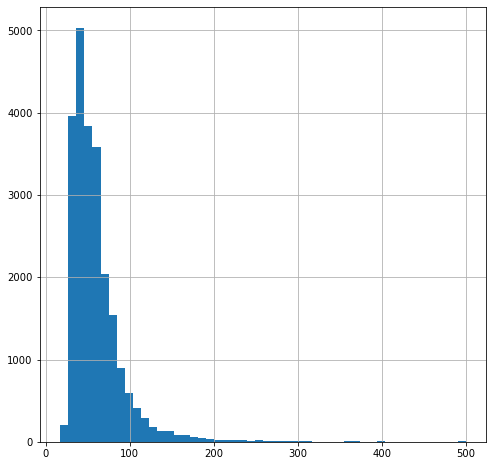

In [342]:
data['total_area'].hist(bins= 50,figsize=(8, 8))
plt.show()

Получили гистограмму с длинным хвостом, на которой заметно,что большую долю рынка занимают квартиры площадью до 100 кв.м. Пик приходится на квартиры площадью 50-60 кв.м.

In [343]:
data['total_area'].describe()

count    23344.000000
mean        60.199066
std         34.184642
min         17.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        500.000000
Name: total_area, dtype: float64

 Посмотрим на медианное значение total_area практически совпадает с пиком на графике.

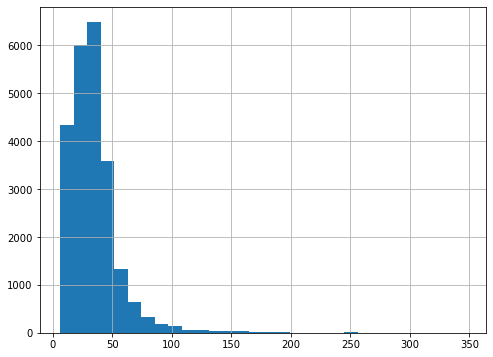

count    23344.000000
mean        34.442469
std         22.097127
min          6.000000
25%         18.000000
50%         30.000000
75%         42.000000
max        347.000000
Name: living_area, dtype: float64

In [344]:
data['living_area'].hist(bins= 30,figsize=(8, 6))
plt.show()
data['living_area'].describe()

Основная доля рынка приходится на квартиры с жилплощадью до 75 кв.м, чаще всего квартиры имееют жилую площадь в 30 кв.м.

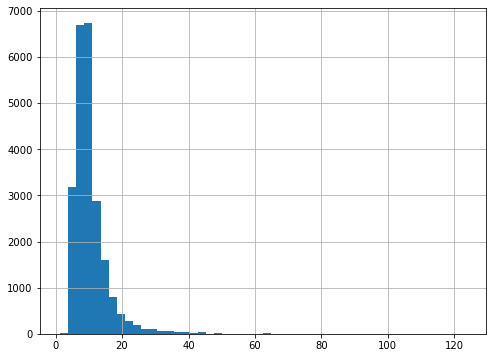

count    23344.000000
mean        10.519625
std          5.724531
min          1.300000
25%          7.100000
50%          9.200000
75%         11.900000
max        123.478328
Name: kitchen_area, dtype: float64

In [345]:
data['kitchen_area'].hist(bins=50,figsize=(8, 6))
plt.show()
data['kitchen_area'].describe()

Большая часть квартир имеет кухни площадью до 20 кв.м. Чаще всего встречаются квартиры c кухней в 9 кв.м.

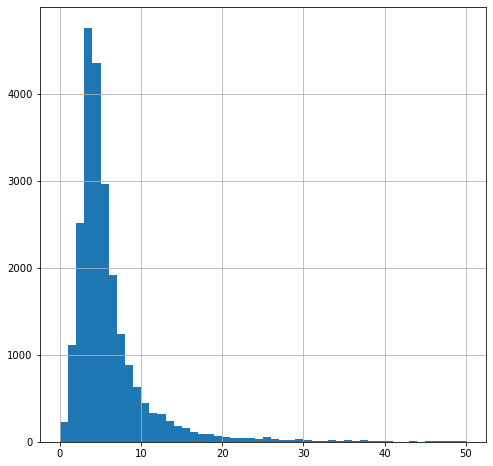

count    2.334400e+04
mean     6.516846e+06
std      1.032941e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [346]:
(data['last_price']/1000000).hist(bins=50, range=(0, 50),figsize=(8, 8))
plt.show()
data['last_price'].describe()


<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Чтобы не делить, может быть удобно отформатировать числа как в `describe`, так и на графике (но не всегда это удобнее)
</div>    


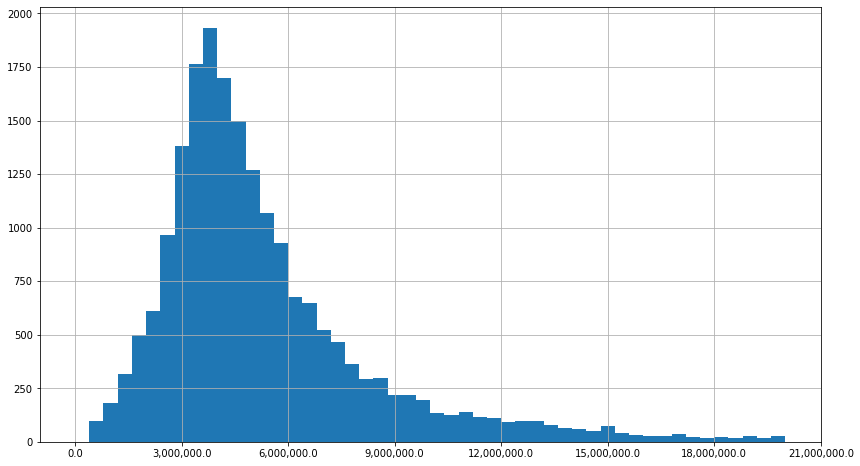

,last_price
count,"20,182"
mean,"6,248,803"
std,"10,299,002"
min,"12,190"
25%,"3,400,000"
50%,"4,550,000"
75%,"6,500,000"
max,"763,000,000"


In [186]:
# Код ревьюера

import matplotlib.ticker as ticker

ax = (data['last_price']).hist(bins=50, range=(0,20 * 10**6) ,figsize=(14, 8))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos : '{:,}'.format(x)))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3 * 10**6))
plt.show()

data['last_price'].describe().to_frame().style.format('{:,.0f}')

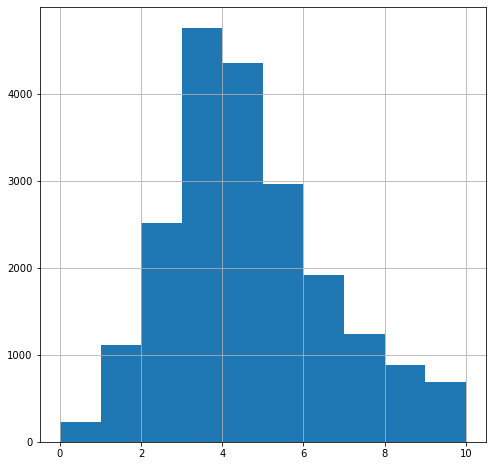

In [347]:
(data['last_price']/1000000).hist(bins=10, range=(0, 10),figsize=(8, 8))
plt.show()

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Или можно через такое же форматирование к подписям выше добавить `' млн.'`</div>    


И опять наблюдаю длинный хвост в распределении,пик стоимости квартир приходится на 3-5 млн.руб. Квартиры стоимостью более 15 млн.руб редкое явление.

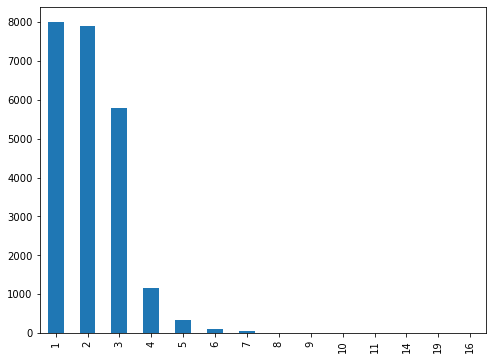

count    23344.000000
mean         2.086361
std          1.059145
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [349]:
data['rooms'].value_counts().plot(kind='bar',figsize=(8, 6))
plt.show()
data['rooms'].describe()

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Т.к. столбец дискретный, то чтобы столбцы были над значениями можно строить барчарт по `value_counts()`</div>    


Пик приходится на  однокомнатные квартиры. Основу рынка составляют 1-,2- и 3-х комнатные квартиры.

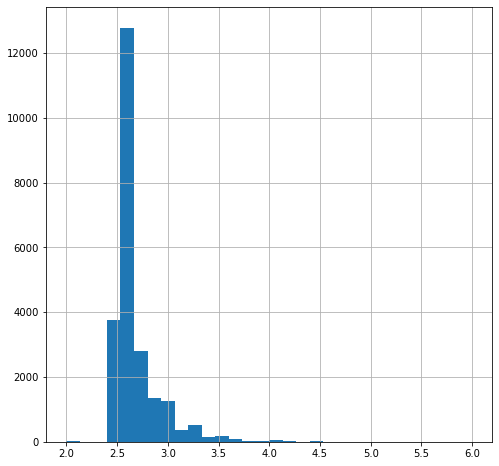

count    23344.000000
mean         2.697747
std          0.236397
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [350]:
data['ceiling_height'].hist(bins=30,range=(2,6),figsize=(8, 8))
plt.show()
data['ceiling_height'].describe()

В основном продаются квартиры с высотой пололков 2,65 метра.

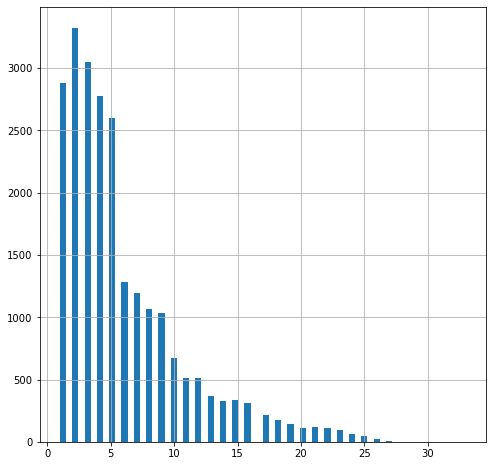

count    23344.000000
mean         5.856923
std          4.850920
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [351]:
data['floor'].hist(bins=66,figsize=(8, 8))
plt.show()
data['floor'].describe()

Квартиры на 2 этаже продаются чаще остальных.В основном хорошо продаются квартиры расположены с 1 по 5 этажи.

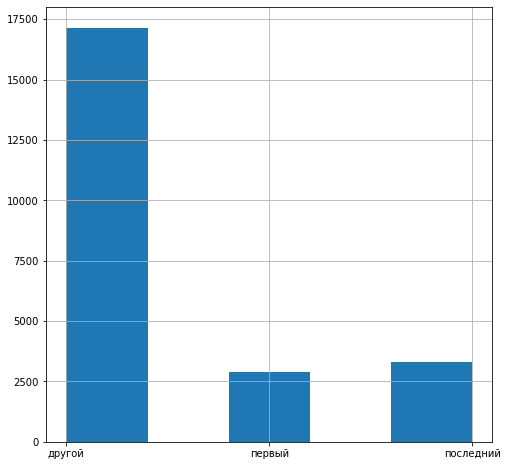

count      23344
unique         3
top       другой
freq       17148
Name: type_floor, dtype: object

In [352]:
data['type_floor'].hist(bins=5,figsize=(8, 8))
plt.show()
data['type_floor'].describe()

В основном проданные квартиры расположены между первым и последним этажем.

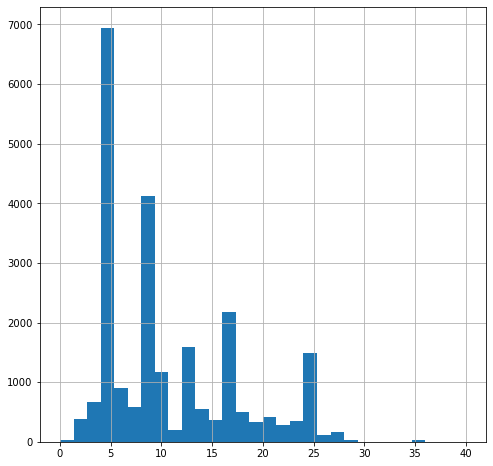

count    23344.000000
mean        10.625857
std          6.566445
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [353]:
data['floors_total'].hist(bins=30,range=(0,40),figsize=(8, 8))
plt.show()
data['floors_total'].describe()

Высотность зданий имеет большой разброс, преобладают 5-и этажные здания.

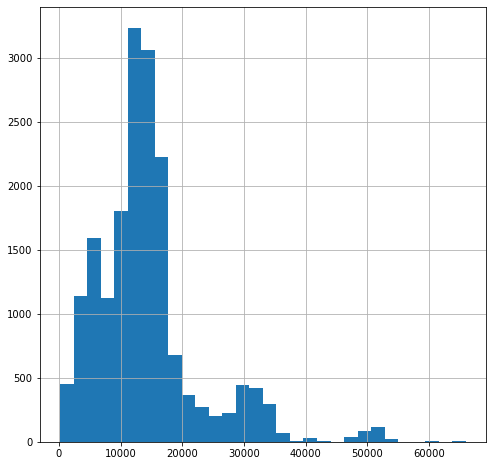

count    17922.000000
mean     14202.487111
std       8628.079574
min        181.000000
25%       9238.000000
50%      13094.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [354]:
data['cityCenters_nearest'].hist(bins=30,figsize=(8, 8))
plt.show()
data['cityCenters_nearest'].describe()

Основная доля проданных квартир распологается в пределах 20 км от центра города. Пик продаж - квартиры в 13 км от центра города.

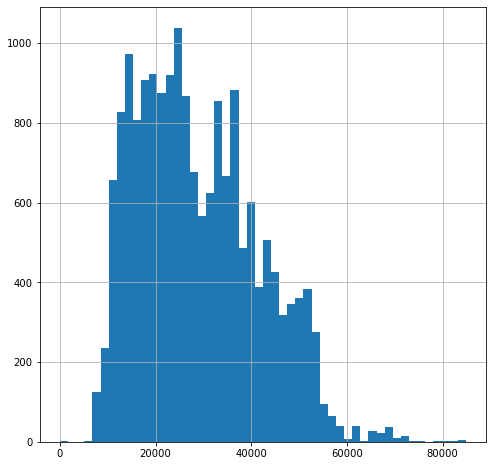

count    17900.000000
mean     28826.089721
std      12628.181167
min          0.000000
25%      18581.000000
50%      26772.000000
75%      37298.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [355]:
data['airports_nearest'].hist(bins=50,figsize=(8, 8))
plt.show()
data['airports_nearest'].describe()

Больше всего продаются квартиры 25-27 км от аэропорта.

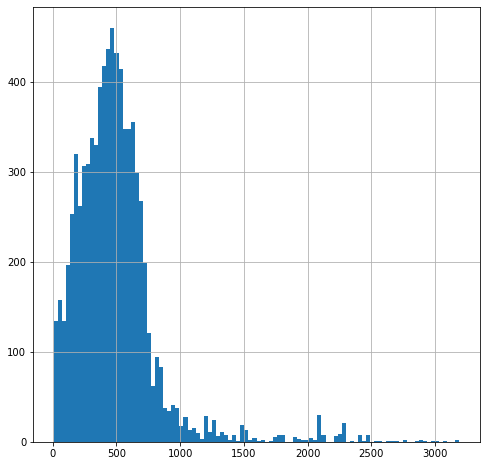

count    7988.000000
mean      490.379695
std       341.742116
min         7.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [356]:
data['parks_nearest'].hist(bins=100,figsize=(8, 8))
plt.show()
data['parks_nearest'].describe()

Популярна недвижимость с наличием парков в 450 метрах.

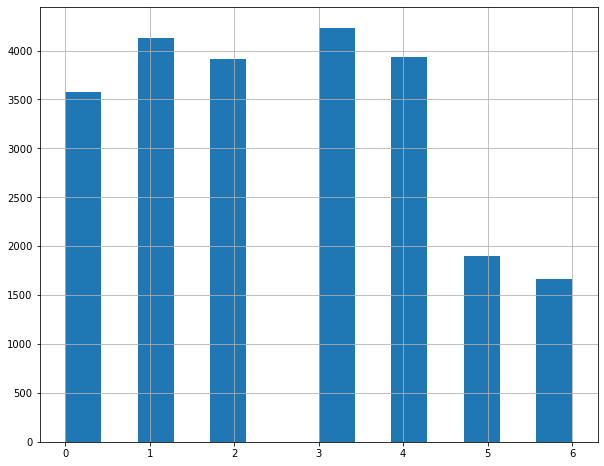

count    23344.000000
mean         2.566098
std          1.789171
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: num_day_week, dtype: float64

In [358]:
data['num_day_week'].hist(bins=14, figsize=(10, 8))
plt.show()
data['num_day_week'].describe()

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Не очень удобно, что дни недели отсортированы не по их порядку в неделе</div>    


Чаще всего объявления публикуются в четверг, намного реже по выходным.

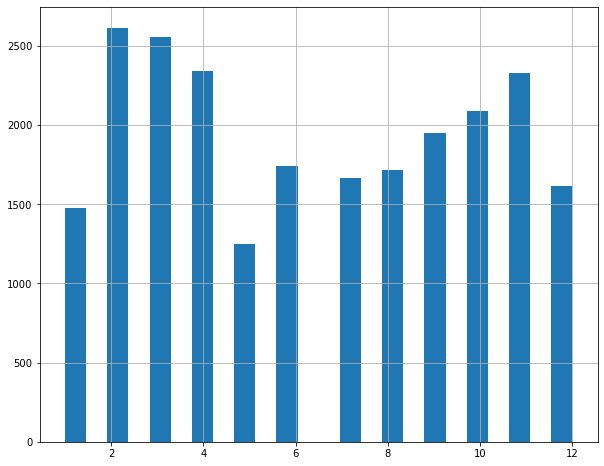

count    23344.000000
mean         6.394962
std          3.491769
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [359]:
data['month'].hist(bins=24, figsize=(10, 8))
plt.show()
data['month'].describe()

Чаще всего объявления публикуют в феврале, к маю количество публикаций снижается и практически совпадает с январским числом,к лету количество немного подрастает, в летние периоды наблюдается стабильность и далее к ноябрю число публикаций растет. 

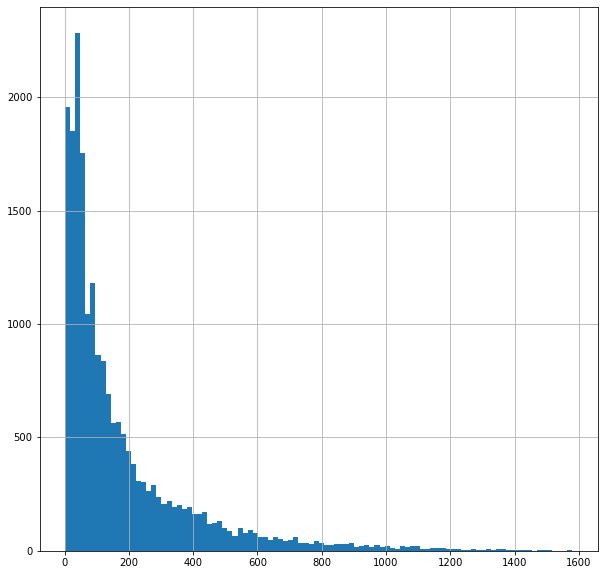

count    20190.000000
mean       181.400842
std        220.091742
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [360]:
data['days_exposition'].hist(bins=100, figsize=(10, 10))
plt.show()
data['days_exposition'].describe()

In [361]:
print('Среднее =', data['days_exposition'].mean())
print('Медиана =', data['days_exposition'].median())

Среднее = 181.4008420009906
Медиана = 96.0


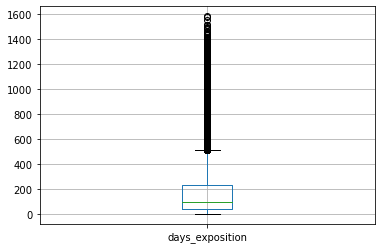

In [362]:
data.boxplot('days_exposition')
plt.show()

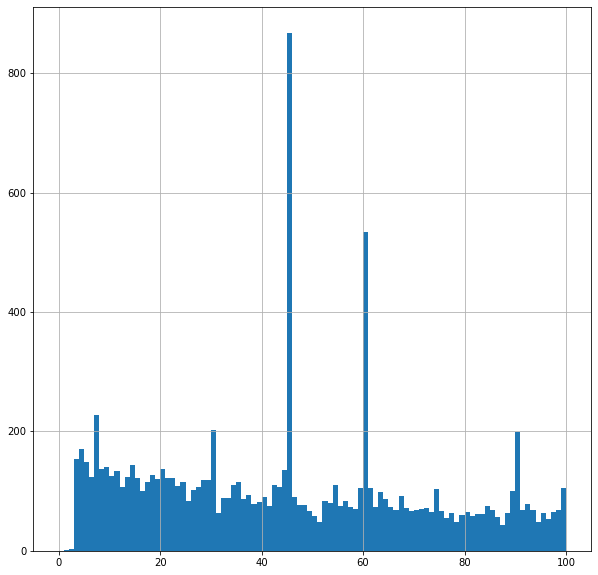

In [363]:
data['days_exposition'].hist(bins=100, range=(0,100),figsize=(10, 10))
plt.show()

Большая часть объявлений снимается с публикации в течении 200 дней ( около 6 месяцев), значит продажи дольше этого периодна можно считать долгими. К быстрым продажам отношу продажи менее ,чем за 45 дней.\
Наблюдаются пики в 44-45, 60 и 90 дней, могут быть связаны с автоматическим снятием объявлений с публикации.Из графиков видно,что дни более 500 являются выбросами.Создадим отдельную таблицу, для дальнейшего исследования.

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Похоже, но опять же, это экспоненциальное распределение. Распределение Пуассона описывает число событий на временном интервале, а экспоненциальное -- время

> Интересно с чем это может быть связано.
    
Автоматическое снятие, может быть: https://yandex.ru/support/realty/owner/home/add-ads-housing.html
    
В целом же всё верно
</div>    


In [364]:
data_day_500 = data.query('days_exposition < 550')
data_day_500.shape[0]

18732

### Определение факторов, влияющих на общую (полную) стоимость объекта.

In [372]:
def plot_pivot (df,col):
    '''функция возвращает график по сводной таблице'''
    return (df.pivot_table(index=col, values='last_price', aggfunc='median')).plot(figsize=(8,6),grid=True)
    

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Стоит датафрейм через параметры функции пердавать</div>    


In [373]:
def corr_pivot(df,col):
    '''расчет корреляции'''
    return df['last_price'].corr(data_day_500[col])

In [374]:
def plot_scat (df,col):
    '''строим диаграмму рассеивания'''
    return df.plot(kind = 'scatter', y = 'last_price', x = col,alpha=0.1, sharex=False)


0.6043355511716044

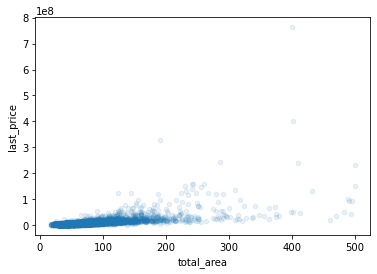

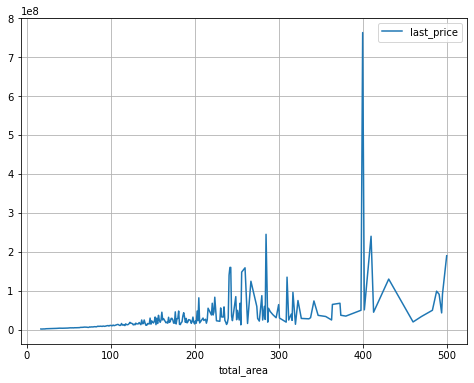

In [376]:
plot_scat (data_day_500,'total_area')
plot_pivot(data_day_500,'total_area')
corr_pivot(data_day_500,'total_area')

Корреляция положительная говорит о прямой,но не сильной зависимости стоимости от общей площади.Особенно сильно влияние для квартир до 100 кв.м,далее зависимость не наблюдается, происходят скачки то в одну, то в другу сторону, у объектов в 400 кв.м. самая высока цена.

0.5482864944992973

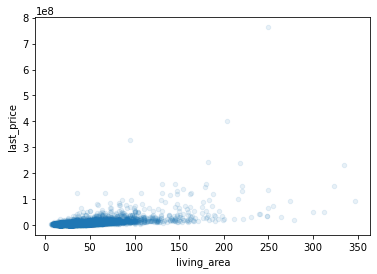

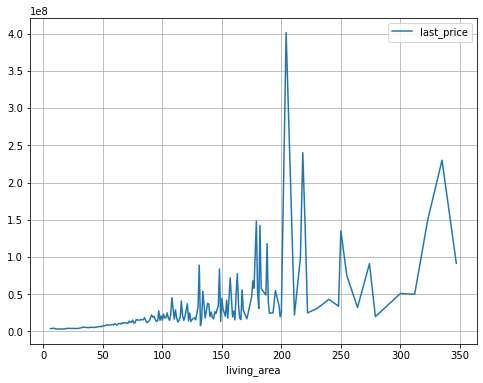

In [377]:
plot_scat (data_day_500,'living_area')
plot_pivot(data_day_500,'living_area')
corr_pivot(data_day_500,'living_area')

Зависимость стоимости от жилой площади наблюдаетсяу объектов с жилплощадью до 75 кв.м, выше этой цифры зависимости нет.

0.428632873737138

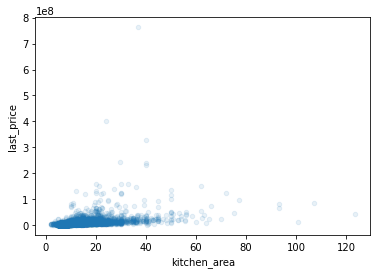

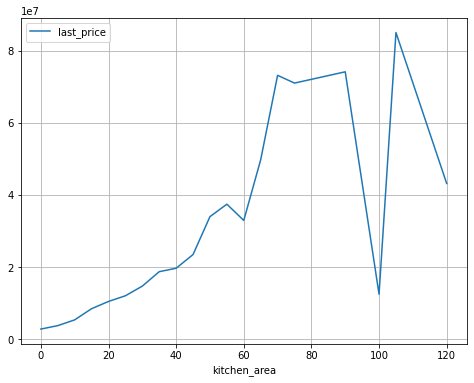

In [378]:
plot_scat (data_day_500,'kitchen_area')
(data_day_500.pivot_table(index=data_day_500['kitchen_area'] // 5 * 5, values='last_price', aggfunc='median')).plot(figsize=(8,6),grid=True)
corr_pivot(data_day_500,'kitchen_area')

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Для непрерывных величин такие графики немного страшноваты, можно делать так (т.е. я разбил площади на интервалы по 5 метров):</div>    


<AxesSubplot:xlabel='kitchen_area'>

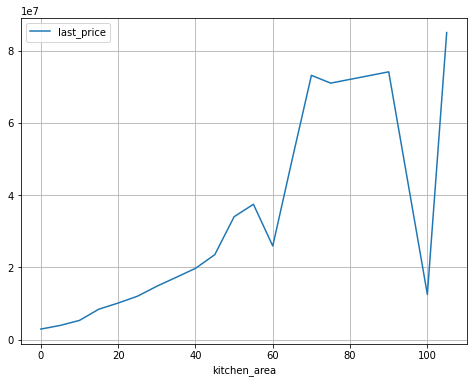

In [187]:
# Код ревьюера

(data_day_500.pivot_table(index=data_day_500['kitchen_area'] // 5 * 5, values='last_price', aggfunc='median')).plot(figsize=(8,6),grid=True)

Площадь кухни влияет на стоимость недвижимости в пределах 40 кв.м, далее зависимость не наблюдается

0.33754062944353724

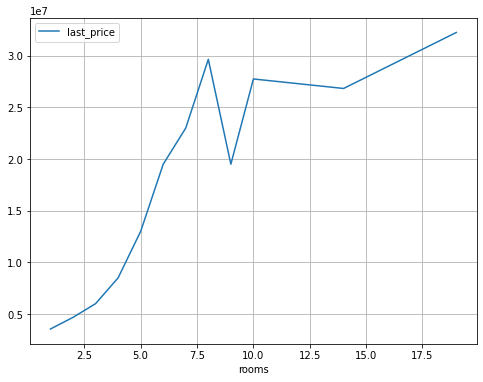

In [379]:
plot_pivot(data_day_500,'rooms')
corr_pivot(data_day_500,'rooms')

Зависимость есть, судя по цифрам не сильная,но смотря на график,это скорее связано с просадкой стоимости в 8-и, 9-и комнатных объектах. Стоимоть квартир от 1 комнаты до 8 растет с ростом числа комнат, далее такой зависимости нет.

<AxesSubplot:xlabel='type_floor'>

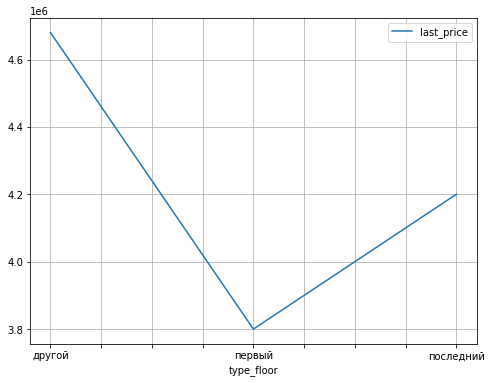

In [380]:
plot_pivot(data_day_500,'type_floor')

Ниже всего стоимость у квартир на 1 этаже.

0.008170872769476945

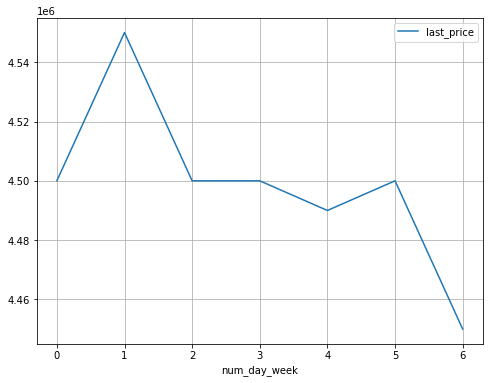

In [381]:
plot_pivot(data_day_500,'num_day_week')
corr_pivot(data_day_500,'num_day_week')

-0.0012504897386937171

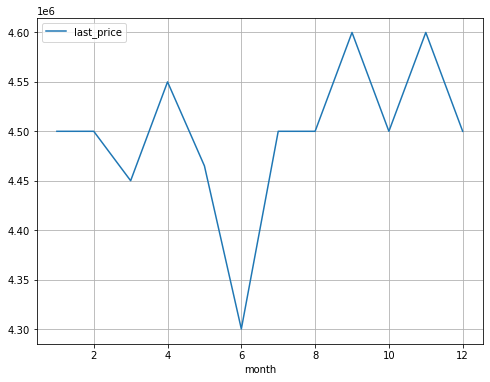

In [382]:
plot_pivot(data_day_500,'month')
corr_pivot(data_day_500,'month')

-0.039264876616004044

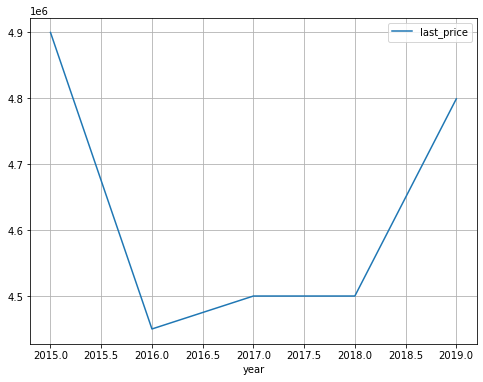

In [383]:
plot_pivot(data_day_500,'year')
corr_pivot(data_day_500,'year')

Прямой зависимости стоимости от дня публикации нет. Объявления опубликованные в понедельник имееют самую высокую цену. Самые дешевые квартиры опубликованы в воскресенье, что вероятнее всего связано с тем,что число публикаций в воскресенье гораздо меньше, чем в понедельник.\
Месяц не имеет влияния на стоимость недвижимости.Дороже всего квартиры в сентябре и ноябре.\
С 2015 по 2016 год стоимость квартир падала, с 2016 по 2017 росла, далее целый год была стабильна и с 2018 года снова происходит сильный рост.

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>

👍
</div>    


### Анализ топ - 10  населенных пунктов по количеству объявлений

In [384]:
data_top_10 = data_day_500.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['mean','count'])
data_top_10.columns = ['mean_price_sq_m','count']
data_top_10 = data_top_10.sort_values(by='count',ascending=False)
data_top_10.head(10)

,mean_price_sq_m,count
locality_name,,
Санкт-Петербург,112171.000483,12435
поселок Мурино,85843.115152,495
Кудрово,94881.770408,392
поселок Шушары,77908.541451,386
Всеволожск,68907.259016,305
Колпино,75090.786441,295
поселок Парголово,89803.073427,286
Пушкин,102188.195730,281
Гатчина,68394.287449,247


Cамой высокая стоимость квадратного метра в Санкт-Петербурге, а низкая в Выборге.

Больше всего объявлений о продаже недвижимости в Санкт-Петербурге, остальные 9 населенных пунктов сильно уступают ему в количестве объявлений.

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>

Минимум и максимум имелся в виду среди топ-10. Чтобы были репрезентативные группы. Т.е. Санкт-Петербург и ВЫборг
</div>    


### Анализ удаленности от центра города на общую стоимость недвижимости

In [395]:
data_Petersburg = data_day_500.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km.isna() == False')
data_Petersburg['cityCenters_nearest_km'] = data_Petersburg['cityCenters_nearest_km'].astype(int)

C:\Users\79879\AppData\Local\Temp\ipykernel_12552\3086376821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Petersburg['cityCenters_nearest_km'] = data_Petersburg['cityCenters_nearest_km'].astype(int)


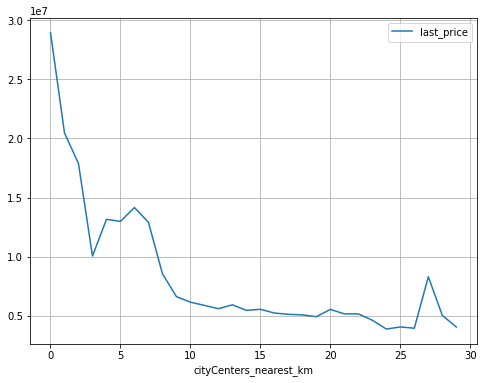

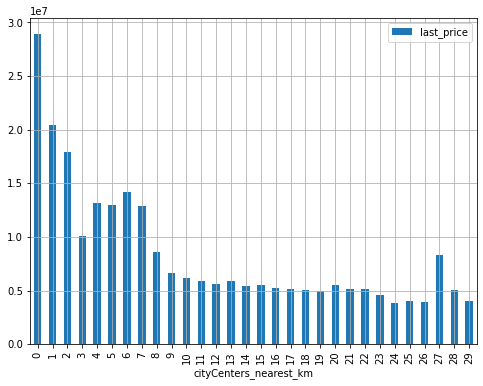

In [397]:

data_Petersburg = data_Petersburg.pivot_table(index='cityCenters_nearest_km', values='last_price',aggfunc='mean')
data_Petersburg.plot(figsize=(8,6),grid=True)
data_Petersburg.plot(kind='bar',y= 'last_price', figsize=(8,6),grid=True)
plt.show()

Квартиры в самом центре дороже остальных. Далее с удаленностью до 3 км цена падает, в радиусе 3-6 км от центра снова наблюдается рост, после до 11 км спад и далее вплоть до 22 км небольшие отклонения ,но в целом стабильность в стоимости.Однако на расстоянии в 27 км от центра снова наблюдается резкий скачок.Цены на недвижимость в 24-26 км от центра ниже всего.

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>

Всё верно 👍 Можно сделать расстояние целым типом, удалив пропуски для графика, чтобы в подписях не было лишних нулей
</div>    


## 5. Вывод

Рынок недвижимости в в Санкт-Петербурге и соседних населённых пунктах очень разнообразен.
 - Так что касается **общей площади** можно подобрать квартиру от 17 до 500 кв.м, встречатся даже такие единичные объекты, у которых площадь достигает 900 кв.м. Чаще всего встречаются квартиры площадью **50-60 кв.м.**
 - Аналогичная ситуация и в **жилой площади, и площади кухни**,поскольку они являются составляющей общей площади.Соответсвенно чаще встречаются жилплощади в **30 кв.м с кухнями в 9-10 кв.м.**
 - Ценовой диапазон так же огромен, но в среднем **стоимость недвижимости** колеблется в пределах **3-5 млн.руб.** 
 - Количество комнат преимущественно у квартир от 1 до 3,чаще всего встречаются **однокомнтаные.**
 - У большинства объектов недвижимости **высота потолка** достигает **2,65 м.**
 - В основном продаются квартиры между первым и последним этажем, чаще всего на **2 этаже**. Преимущественно квартиры располагаются **в 5-и этажных домах**.
 - В 13 км от центра города и в 26 км от аэропорта число объявлений достигает максимума.
 - Объявления чаще всего публикуют со вторника по четверг, больше всего приходится на четверг, а вот по выходным объявления публикут гораздо реже.Что касается времени года, то больше всего публикаций приходится на февраль и чуть меньше на ноябрь.
 - Продают недвижимость по разному,какие-то объявления закрывают и в течение 45 дней, а какие-то публикуются годами, но всреднем **в течение полугода квартиры продаются.**
### Что же влияет на стоимость недвижимости?
 - Исходя из данных наблюдается довольно сильная **зависимость стоимости от общей площади, а соответсвенно и жилой площади** , но это касается объектов с общей площадью **до 100 кв.м, жилой до 75 кв.м.** У недвижимости превышающей эти значения, площадь мало нвлияет на стоимость.Площадь кухни никак не отражается на общей стоимости.
 - Самая низкая стоимость у квартир на **первом этаже**.
 - Время публикации на стоимость не влияет.Но наблюдаются пики стоимости в октябре и ноябре, а так же рост цен с 2018 года.
 
 
Больше всего объявлений публикуют в Санкт-Петербурге, остальные населенные пункты сильно уступают в числе публикаций.
Самый дорогой квадратный метр у недвижимости в поселке Лисий Нос.Дешевле всего приобретать недвижимость в деревне Старополье, где за квадратный метр просят 11238 руб.
Квартиры в самом центре дороже остальных.


<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>

Хорошая работа 👍 Здорово, что важное выделено жирным</div>    
